In [4]:
import requests
import json
import io
from html.parser import HTMLParser
from datetime import datetime
from datetime import timedelta
import sport_api
import fantasy_logic
import parse_class
import re
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def read_params(fn): 
    d ={} 
    try:
        with open(fn, 'r',encoding="utf-8") as file: 
            d = json.load(file) 
    except FileNotFoundError:
        print ("Error. Can't find file " + fn)
        d = {}
    return d 

In [18]:
#parser = MyHTMLParser()
settings =  read_params('settings.json')
sports = sport_api.sportsApiMethods(settings)

In [23]:
def get_plot_statistics(sports, key, settings):
    team_id = settings["fantasy_settings"]["tournaments"][key]["team_id"]
    tours_stats = sports.getMyTeamInfoAllTours(team_id = team_id).reset_index()
    if len(tours_stats) == 0:
        return    
    tours_stats['points'] = tours_stats.apply(lambda x: str(x['points']).replace('-', '0'), axis=1)
    tours_stats = tours_stats[tours_stats['row'] != '0']
    tours_stats['points'] = tours_stats['points'].astype(int)
    tours_stats.replace('-', '0').groupby('tour').agg({'points':'sum'}).plot()
    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.title(key)
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.show()

[autoreload of parse_class failed: Traceback (most recent call last):
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/home/donaldwipper/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    up

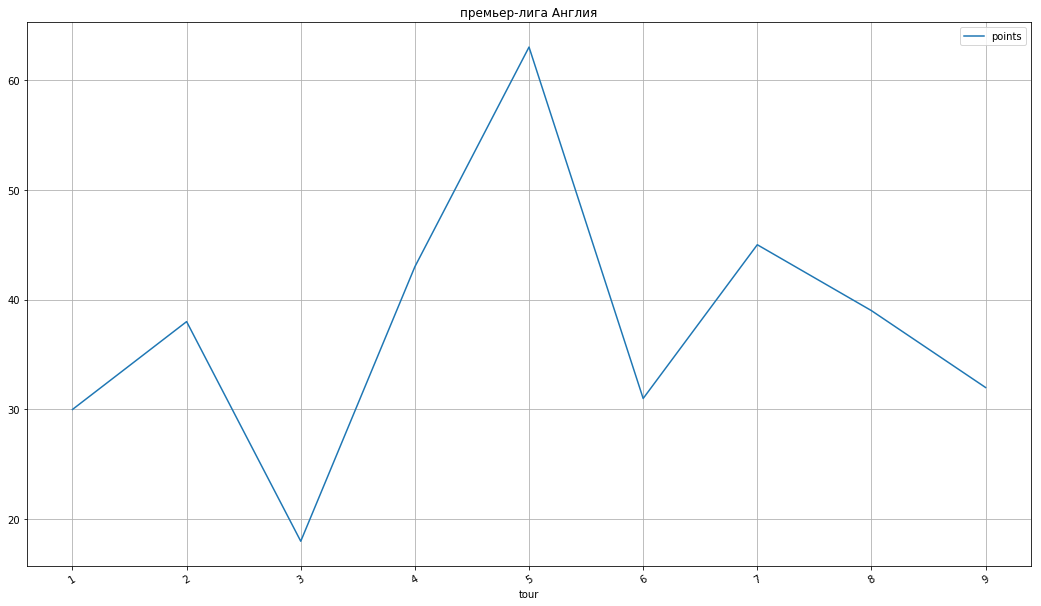

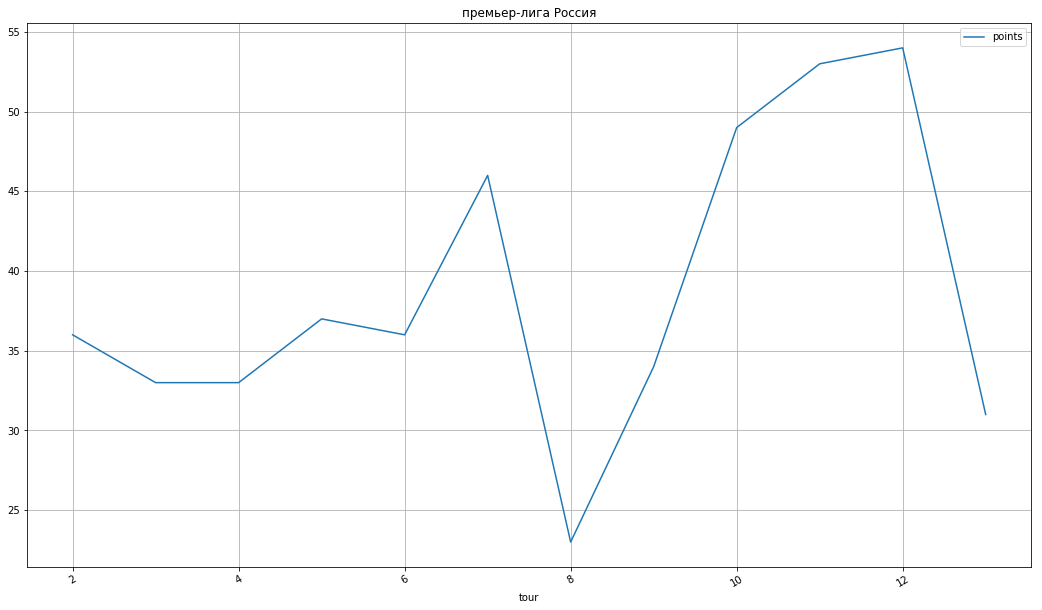

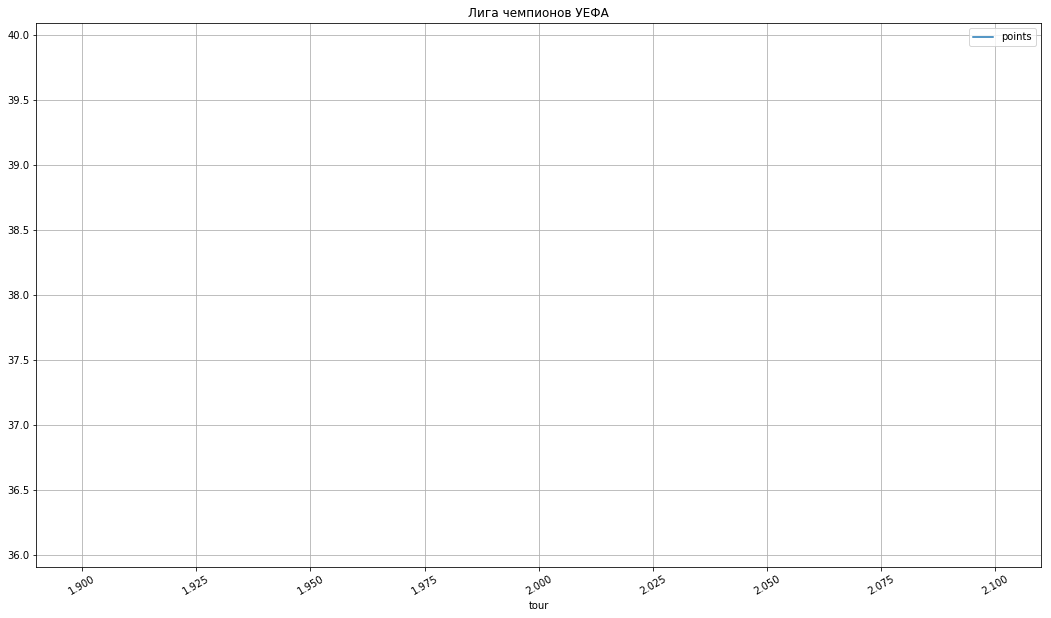

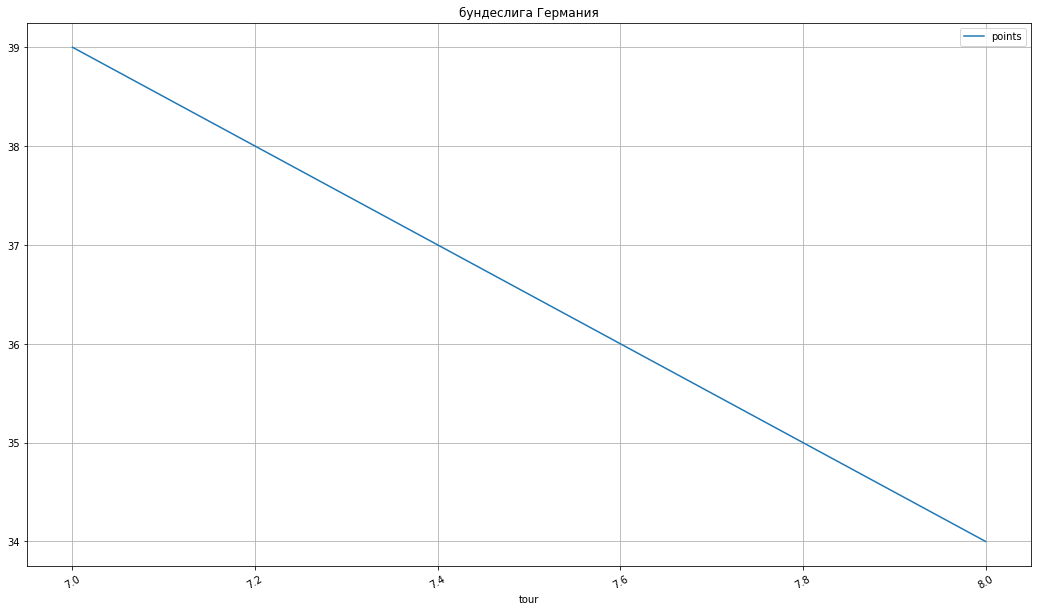

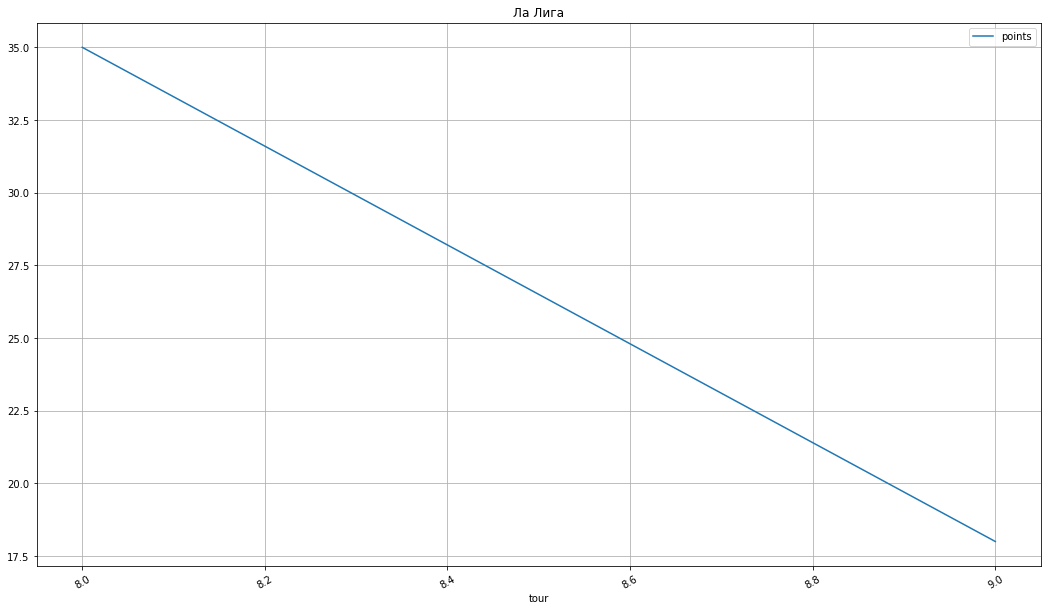

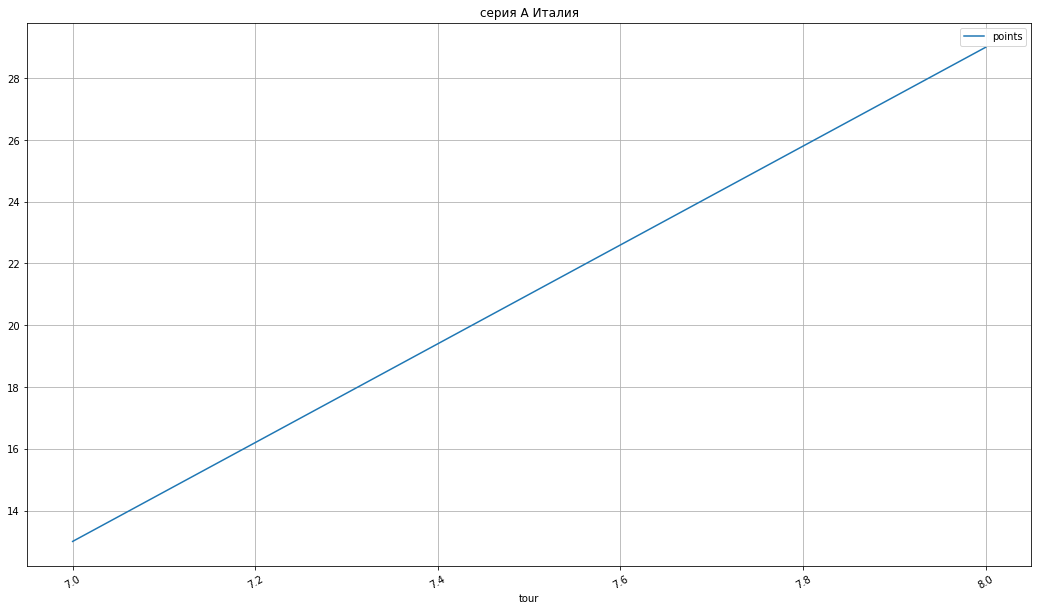

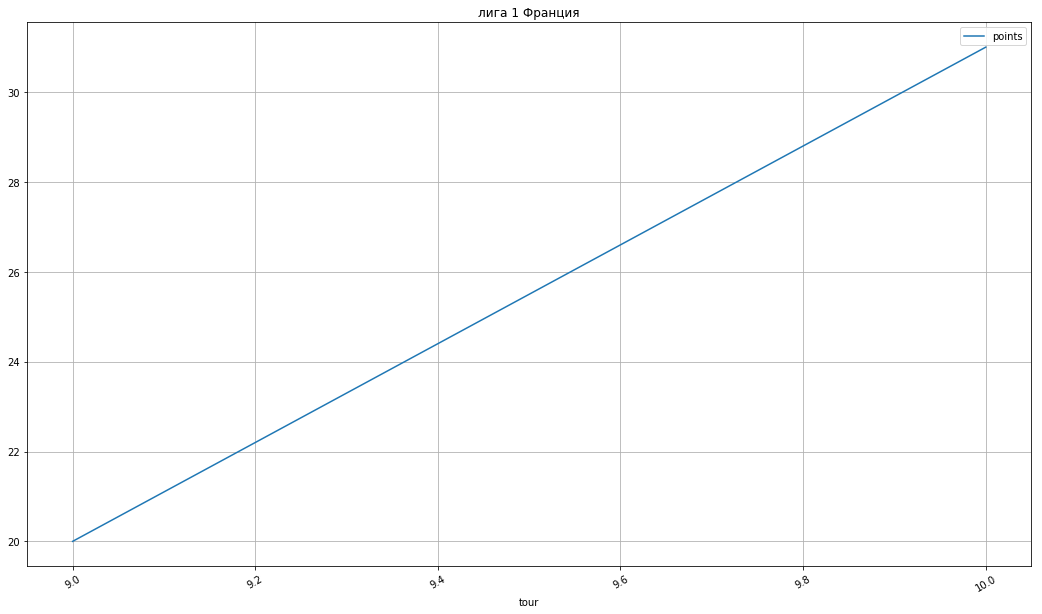

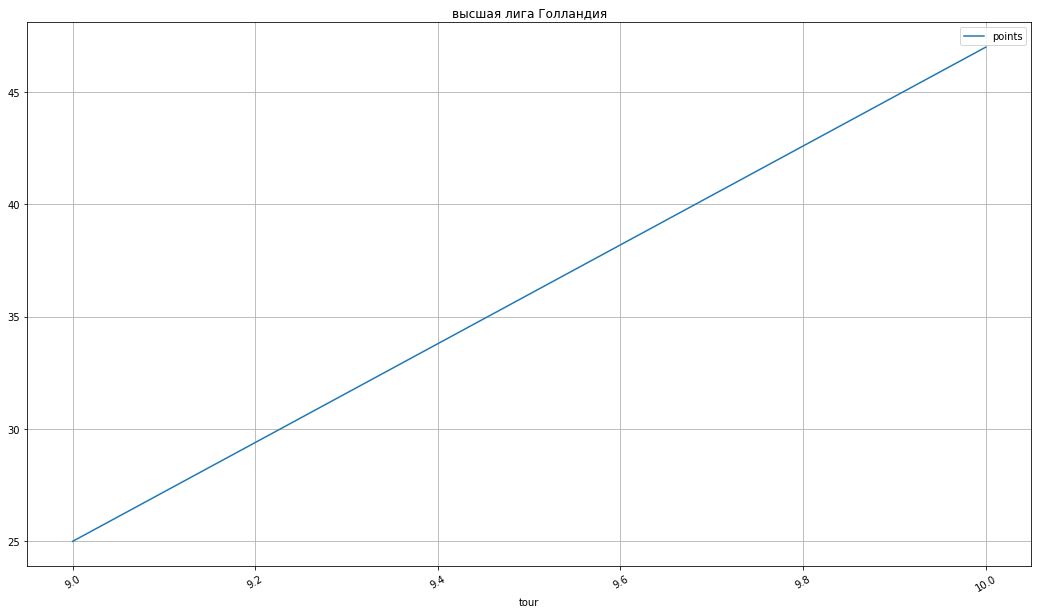

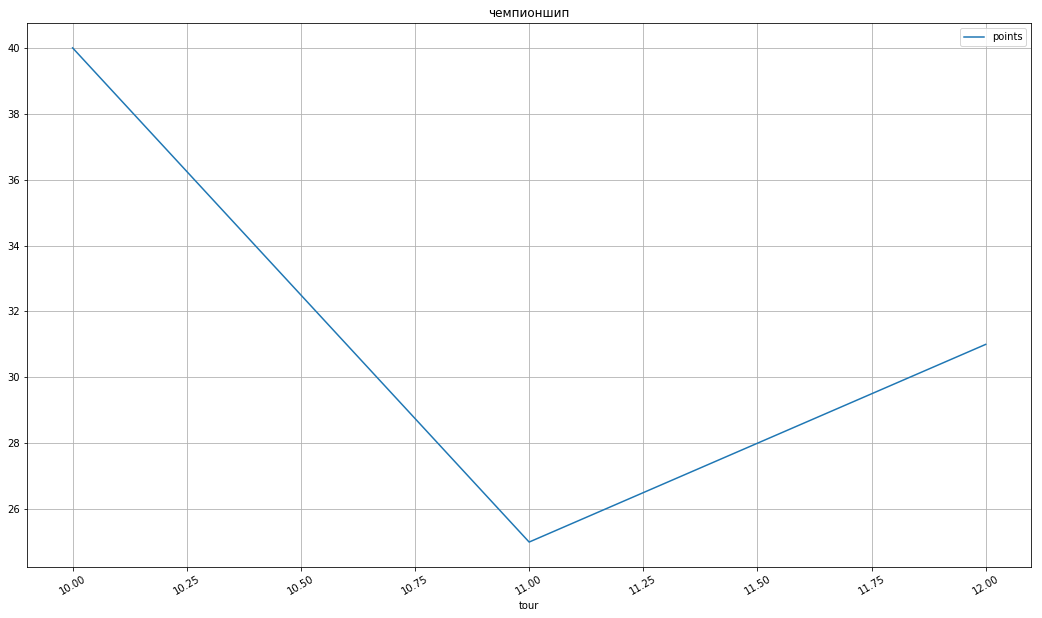

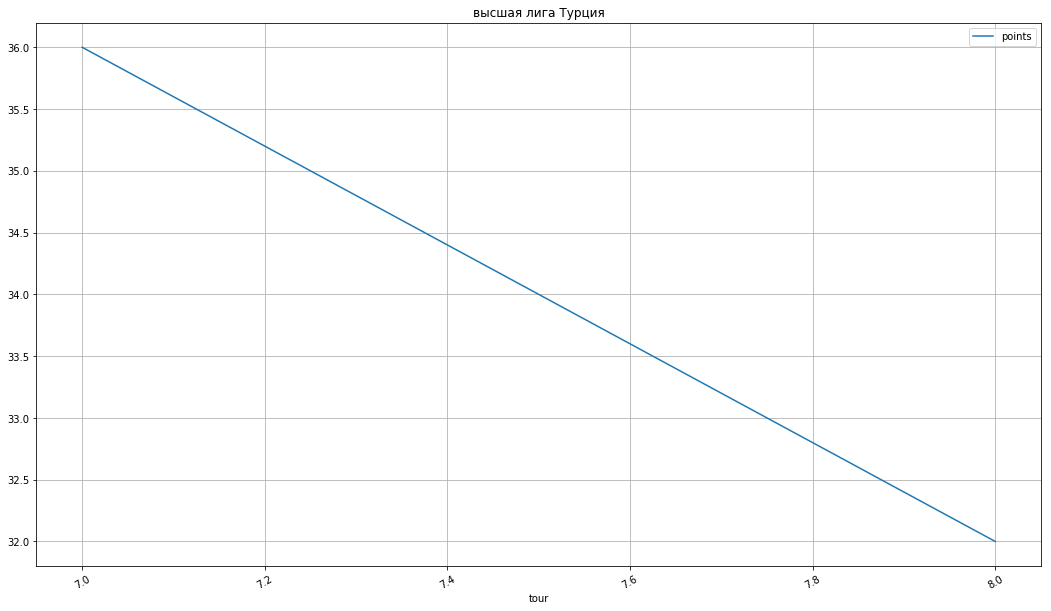

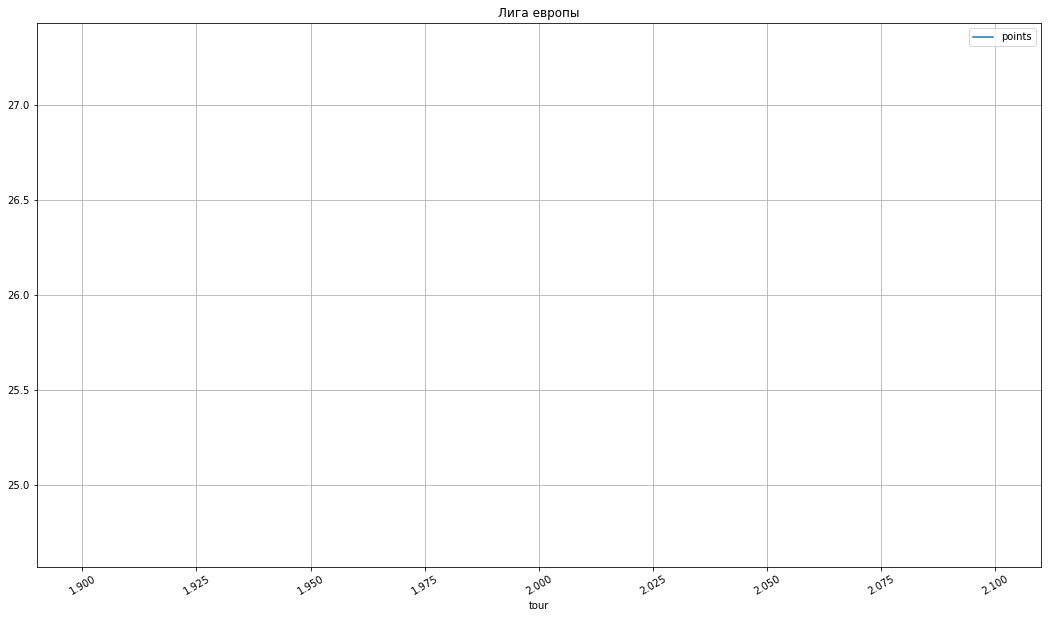

In [25]:
for key in settings["fantasy_settings"]["tournaments"]:
    get_plot_statistics(sports, key, settings)

In [14]:
settings["fantasy_settings"]

{'login': 'd.utiralov@gmail.com',
 'url_login': 'https://sports.ru/login',
 'password': '41cda56553',
 'tounaments': {'PL': {'team_id': 2150635,
   'tournament_id': 52,
   'season_id': 7380,
   'number_subs': 3,
   'max_player_one_team': 2},
  'RPL': {'team_id': 2104286,
   'tournament_id': 31,
   'season_id': 7371,
   'number_subs': 3,
   'max_player_one_team': 2},
  'CL': {'team_id': 2179415,
   'tournament_id': 57,
   'season_id': 6855,
   'number_subs': 3,
   'max_player_one_team': 2},
  'бундеслига Германия': {'team_id': 2194810,
   'tournament_id': 50,
   'season_id': 7390,
   'number_subs': 3,
   'max_player_one_team': 2},
  'Ла Лига': {'team_id': 2194809,
   'tournament_id': 49,
   'season_id': 7393,
   'number_subs': 3,
   'max_player_one_team': 2},
  'серия А Италия': {'team_id': 2194811,
   'tournament_id': 48,
   'season_id': 7471,
   'number_subs': 3,
   'max_player_one_team': 2},
  'лига 1 Франция': {'team_id': 2194812,
   'tournament_id': 51,
   'season_id': 7383,
   'nu

In [ ]:
parser = MyHTMLParser() 
resp = sports.getMainFantasyPage()
resp.text
#resp = sports.getMainFantasyPage()
#parser.feed(resp.text)
#resp.text